In [5]:
import xarray as xr

fluxcom = xr.open_dataset('/gpfsdswork/projects/rech/mlr/udy16au/ipsl_dcpp/data/fluxcom.nc')

In [6]:
fluxcom

<xarray.Dataset>
Dimensions:        (lon: 720, lat: 360, time: 408, nbnds: 2, bounds: 2)
Coordinates:
  * lon            (lon) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * lat            (lat) float64 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * time           (time) object 1980-01-15 00:00:00 ... 2013-12-15 00:00:00
    lon_bnds       (lon, bounds) float64 ...
    lat_bnds       (lat, bounds) float64 ...
Dimensions without coordinates: nbnds, bounds
Data variables:
    gpp            (lat, lon, time) float32 ...
    cell_measures  (lat, lon) float64 ...
    time_bnds      (time, nbnds) object ...
Attributes:
    title:         FLUXCOM (RS+METEO) Global Land Carbon Fluxes using CRUNCEP...
    version:       1
    institutions:  Department Biogeochemical Integration, Max Planck Institut...
    source:        Data generated by Artificial Neural Networks and forced wi...
    history:       \n2024-01-18: downloaded ['GPP.ANN.CRUNCEPv6.monthly.1980....
    references:    \n@ARTICLE{Jung2019,\n  author = {Jung, M., S. Koirala, U....

In [ ]:
#linearly detrend by two different periods ? (1979–1999 and 2000–2018).

In [18]:
#get IAV for whole period 
yearly_means = fluxcom.groupby('time.year').mean()

/gpfsdswork/projects/rech/mlr/udy16au/miniconda3/envs/env_gpu5/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/gpfsdswork/projects/rech/mlr/udy16au/miniconda3/envs/env_gpu5/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


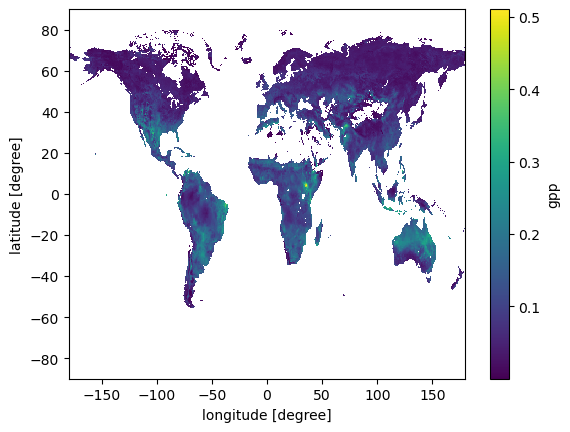

In [26]:
yearly_means.std(dim='year').isel(bounds=0)['gpp'].plot.pcolormesh()

In [ ]:
#to download VFS
#https://sites.google.com/view/zhangyaonju/dataset
#wget --ftp-user=download_21244243 --ftp-password=58773744 ftp://ftp2.tpdc.ac.cn:6201/CMG_0.05_monthly/*